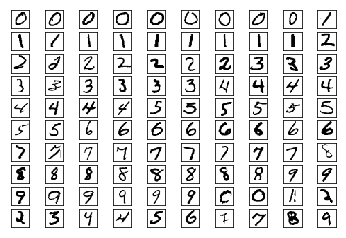

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist.data.shape

# mnist_data = mnist.data.flatten
# mnist_data.shape

fig, digitplt = plt.subplots(10,10, subplot_kw=dict(xticks=[], yticks=[]))
for i, axis in enumerate(digitplt.flat):
    axis.imshow(mnist.data[700*i].reshape(28, 28), cmap='gray_r')

In [192]:
train_size = int(len(mnist.data)*.25)
test_set = mnist.data[::30]
# test_labels = mnist.target[:train_size]

train_set = mnist.data[::20]
# train_labels = mnist.target[train_size:]

from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

pca = PCA(n_components=2).fit_transform(train_set)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10).fit(pca)

In [193]:
h = 0.2
x_min, x_max = pca[:, 0].min() - 1, pca[:, 0].max() + 1
y_min, y_max = pca[:, 1].min() - 1, pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


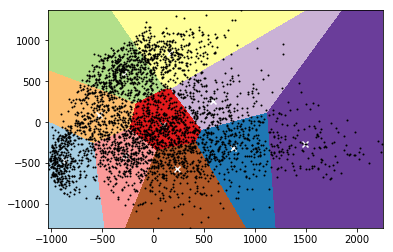

In [194]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color = 'w', linewidths=3)
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize=2)

In [185]:
labelled_centroids = []
labels = kmeans.predict(centroids)
# print(labels[1])
for i in range(0,10):
    cen = (labels[i], centroids[i])
    labelled_centroids.append(cen)
    
print(labelled_centroids)



[(0, array([-0.03285421,  0.01638485])), (1, array([0.00927248, 0.00338231])), (2, array([ 0.00848085, -0.02111428])), (3, array([-0.00247389,  0.04177221])), (4, array([-0.06577936, -0.01817394])), (5, array([0.00159321, 0.015408  ])), (6, array([ 0.00932392, -0.00866409])), (7, array([-0.03158028, -0.00905498])), (8, array([ 0.00674042, -0.04075445])), (9, array([-0.00547833,  0.00067515]))]


In [186]:
def classify_digits(num, labelled_centroids):
    min_distance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - num)
        if (distance < min_distance):
            min_distance = distance
            closest_label = label
    return closest_label

In [191]:
pca_test = PCA(n_components=2).fit_transform(test_set)
kmeans.predict(pca_test)

array([8, 3, 8, ..., 3, 4, 4], dtype=int32)

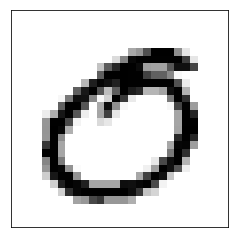

In [190]:
# print(pca_test[1])
# mnist.target
fig, ax = plt.subplots(1,1, subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(test_set[4].reshape(28,28),cmap='gray_r')

In [155]:
lab = kmeans.predict(centroids)
print(lab)

[0 1 2 3 4 5 6 7 8 9]


In [135]:
PCA(n_components=2).fit_transform(train_set)

array([[ 241.58300978, -230.18907699],
       [-122.61053212,  237.59729528],
       [ -20.45016476,    4.84143133],
       ...,
       [-736.28423061, -290.40662569],
       [-894.42992019,  -93.85897205],
       [-680.48792608,  289.44925397]])